<a href="https://colab.research.google.com/github/awhooshingwind/Math254/blob/main/jpierson_wp3_suppl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

import matplotlib as mpl

# Module 3 Writing Project - Clustering


### Class and Function Definition

In [119]:
# Given List of Vertices, Return Area of Polygon
def poly_area(pts):
  x_pts, y_pts = zip(*pts)
  n = len(pts)
  sum = 0
  for i in range(n-1):
    sum += x_pts[i]*y_pts[i+1]-x_pts[i+1]*y_pts[i]
  return sum/2

# Complete (hopefully) counterclockwise triangles given list of points
def make_tri(start, vertices):
  tri = tuple(vertices[start]), tuple(vertices[start+1]), tuple(vertices[start+2]), tuple(vertices[start])
  return np.array(list(tri))

In [120]:
class PolySolve:
  """ Attempt at defining a class to solve polygon problem"""
  def __init__(self, name, points):
    self.name = name
    self.poly = []
    self.names = ['Given Polygon']
    self.color_list = ['palegreen']

    self.given_poly = np.array(points)
    self.poly.append(self.given_poly)
    self.start = self.given_poly[0]
    self.mid = self.given_poly[len(self.given_poly)//2]
  
  def make_piece(self, name, start, tri_points, color):
    self.names.append(name)
    tri = make_tri(start, tri_points)
    self.poly.append(tri)
    self.color_list.append(color)
  
  def add_piece(self, name, points, color):
    self.names.append(name)
    self.poly.append(points)
    self.color_list.append(color)
  
  def make_plot(self, ax):
    # make dict
    self.polys = dict(zip(self.names, self.poly))
    # Plot loop
    for test_key, test_color in zip(self.polys.keys(), self.color_list):
      test_xvals, test_yvals = zip(*self.polys[test_key])
      ax.scatter(test_xvals, test_yvals, color='k', lw=0.2)
      # print(test_key)
      if test_key == 'Given Polygon':
        if 'Overlay' in self.polys.keys():
          p = Polygon(self.polys[test_key], ec='k', lw=3.5, fc=test_color, fill=True, hatch = 'O', label=test_key, alpha=0.99)
        else:
          p = Polygon(self.polys[test_key], ec='k', lw=2.5, fc=test_color, fill=False, hatch = '//', label=test_key, alpha=0.8)
        ax.text(
        1, 3, 'A = '+str(poly_area(self.polys[test_key])), ha="center", va="center", rotation=0, size=20,
        bbox=dict(boxstyle="round4,pad=0.5", fc="lightseagreen", ec="k", lw=2))
      elif test_key == 'Overlay':
        p = Polygon(self.polys[test_key], ec='k', lw=2, fc=test_color, fill=True, hatch = '|', label=test_key, alpha=0.6)
        pts = self.polys[test_key].mean(axis=0)
        ax.text(
        pts[0], pts[1], 'Overlay = '+str(poly_area(self.polys[test_key])), ha="center", va="center", rotation=0, size=18,
        bbox=dict(boxstyle="round4,pad=0.5", fc="azure", ec="k", lw=2))
      else:
        p = Polygon(self.polys[test_key], facecolor=test_color, ec = 'k', lw=0.2,fill=True, label=test_key, alpha = 0.75)
        pts = self.polys[test_key].mean(axis=0)
        ax.text(
        pts[0], pts[1], str(poly_area(self.polys[test_key])), ha="center", va="center", rotation=0, size=16,
        bbox=dict(boxstyle="round4,pad=0.5", fc="peachpuff", ec="k", lw=2))
      ax.add_patch(p)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(str(self.name), fontsize=18)
    ax.legend(fontsize=20)
    ax.grid()

## Solution Cases

In [118]:
# Make Problem Polygon
prob_poly = np.array([(-1, 1), (1, 3), (3, 2), (5, 3), (-3, 5), (-1, 1)])

### Interior Approach (Triangles)

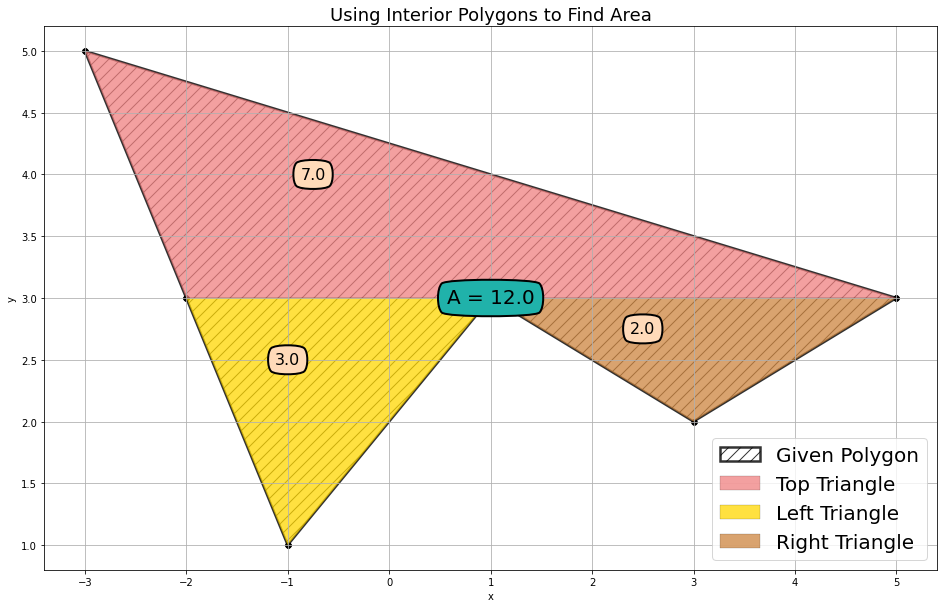

In [73]:
# Interior approach
B = (16, 10)
fig, ax = plt.subplots(figsize=(B))
# Make new solver class
main_case = PolySolve('Using Interior Polygons to Find Area', prob_poly)
# top tri
top_tri = np.array([(-3, 5), (-2, 3), (5, 3), (-3, 5)])
main_case.add_piece('Top Triangle', top_tri, 'lightcoral')
# left tri
left_tri = np.array([(-2, 3), (-1, 1), (1, 3), (-2, 3)])
main_case.add_piece('Left Triangle', left_tri, 'gold')
# right tri
right_tri = np.array([(1, 3), (3, 2), (5, 3), (1, 3)])
main_case.add_piece('Right Triangle', right_tri, 'peru')
# plot
main_case.make_plot(ax)
plt.show()

### Exterior Approach (Trapezoid Overlay)


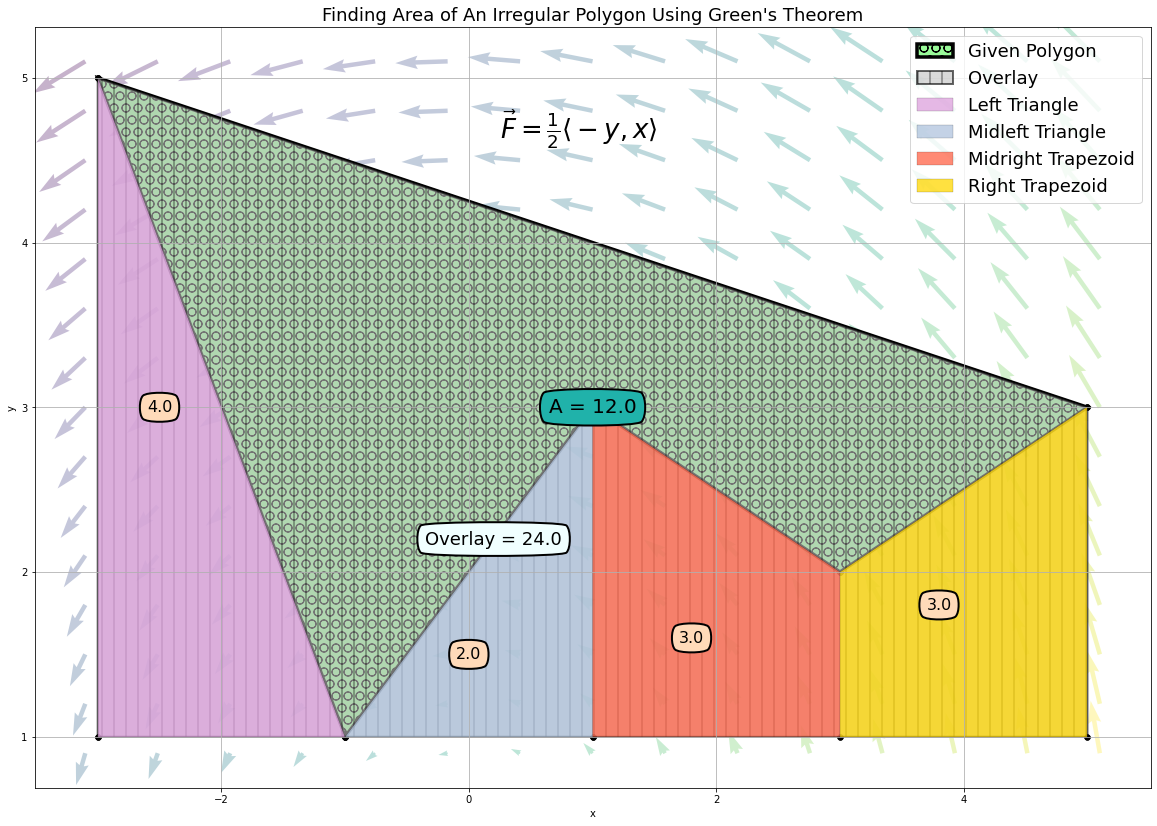

In [92]:
# Make Figure
A = (20, 14)
fig,ax = plt.subplots(figsize=A)

trap_case = PolySolve('Finding Area of An Irregular Polygon Using Green\'s Theorem', prob_poly)
# Define Main Overlay
lrg_trap = np.array([(-3, 1), (5, 1), (5, 3), (-3, 5), (-3, 1)])
trap_case.add_piece('Overlay', lrg_trap, 'silver')
# Make Sub Polys
# left
tri_left = np.array([(-3, 5), (-3, 1), (-1,1), (-3, 5)])
trap_case.add_piece('Left Triangle', tri_left, 'plum')
# mid left
tri_midleft = np.array([(-1, 1), (1, 1), (1, 3), (-1, 1)])
trap_case.add_piece('Midleft Triangle', tri_midleft, 'lightsteelblue')
# mid right (somewhat optional, could just double right area)
trap_midright = np.array([(1, 1), (3, 1), (3, 2), (1, 3), (1, 1)])
trap_case.add_piece('Midright Trapezoid', trap_midright, 'tomato')
# right
trap_right = np.array([(3, 2), (3, 1), (5, 1), (5, 3), (3, 2)])
trap_case.add_piece('Right Trapezoid', trap_right, 'gold')

# Draw quiver for Vector Field F
N = 15
lim = [-3.1, 5.1]
X, Y = np.linspace(lim[0], lim[1], N),np.linspace(0.9, lim[1], N)
U,V = np.meshgrid(X, Y)
C = [-V/2**2 + U/2**2]
q = ax.quiver(X, Y, -V/2, U/2, C, alpha=0.3)
quiv_label = ax.text(0.25, 4.635, r'$\vec{F} = \frac{1}{2}\left\langle -y, x \right\rangle $', fontsize=26)
# Make Plot
trap_case.make_plot(ax)
ax.legend(loc='upper right', fontsize=18)
plt.show()

### Testing Other Irregular Polygons


---



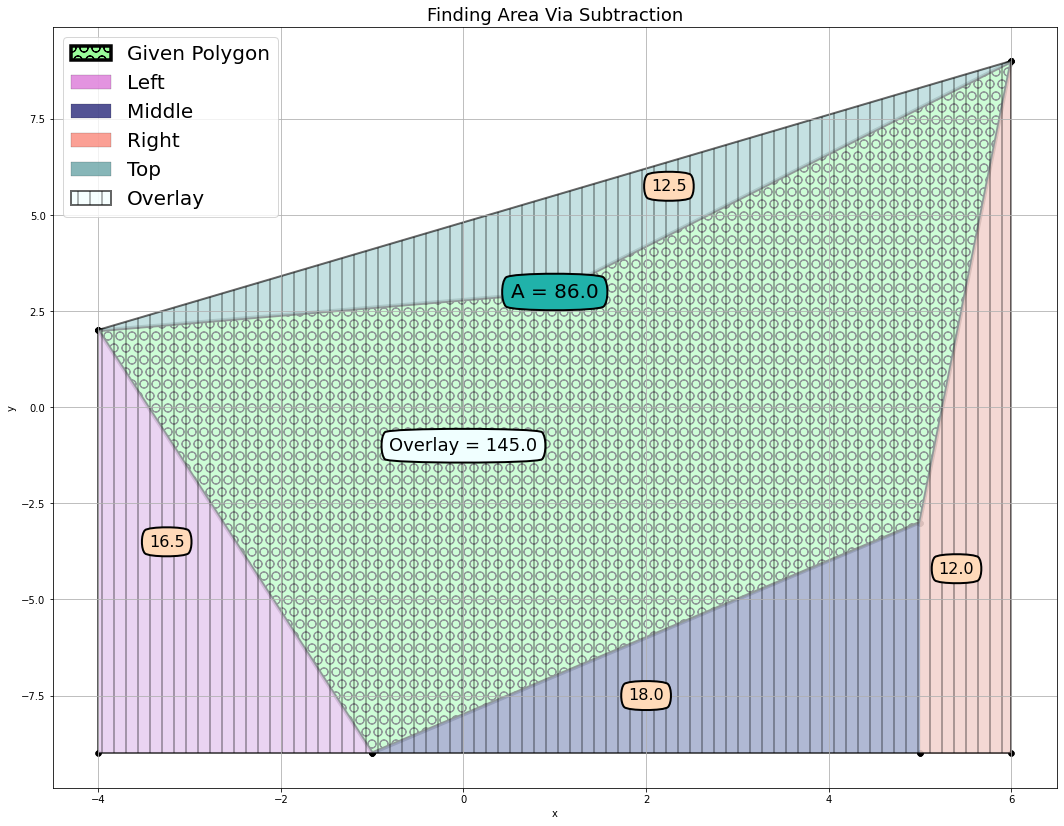

In [93]:
# Generalized Exterior Approach (trapezoid overlay)
C = (18, 14)
fig, ax = plt.subplots(figsize=(C))

test_poly = np.array([(-4, 2), (-1, -9),(5, -3), (6, 9), (1, 3), (-4, 2)])
Case2 = PolySolve('Finding Area Via Subtraction', test_poly)

# Find some key points manually
start = tuple(test_poly[0])
min_pt = tuple(min(test_poly, key=lambda n: (n[1], -n[0])))
max_pt = tuple(max(test_poly, key = lambda n: (n[0],n[1])))
left_corner = (start[0],min_pt[1])
far_right_corner = (max_pt[0], min_pt[1])
# left
left = np.array(([start, left_corner, min_pt, start]))
Case2.add_piece('Left', left, 'orchid')
# mid
mid = np.array([min_pt, (test_poly[2][0], min_pt[1]), test_poly[2], min_pt])
Case2.add_piece('Middle', mid, 'midnightblue')
right_corner = tuple(mid[1])
# right
right = np.array([right_corner, far_right_corner, max_pt, test_poly[2], right_corner])
Case2.add_piece('Right', right, 'salmon')
# top
top = np.array([max_pt, test_poly[0], test_poly[-2], max_pt])
Case2.add_piece('Top', top, 'cadetblue')
# overlay
overlay = np.array([start, left_corner, far_right_corner, max_pt, start])
Case2.add_piece('Overlay', overlay, 'azure')
# Make Plot
Case2.make_plot(ax)

plt.show()

### Testing More Algorithmic Approach

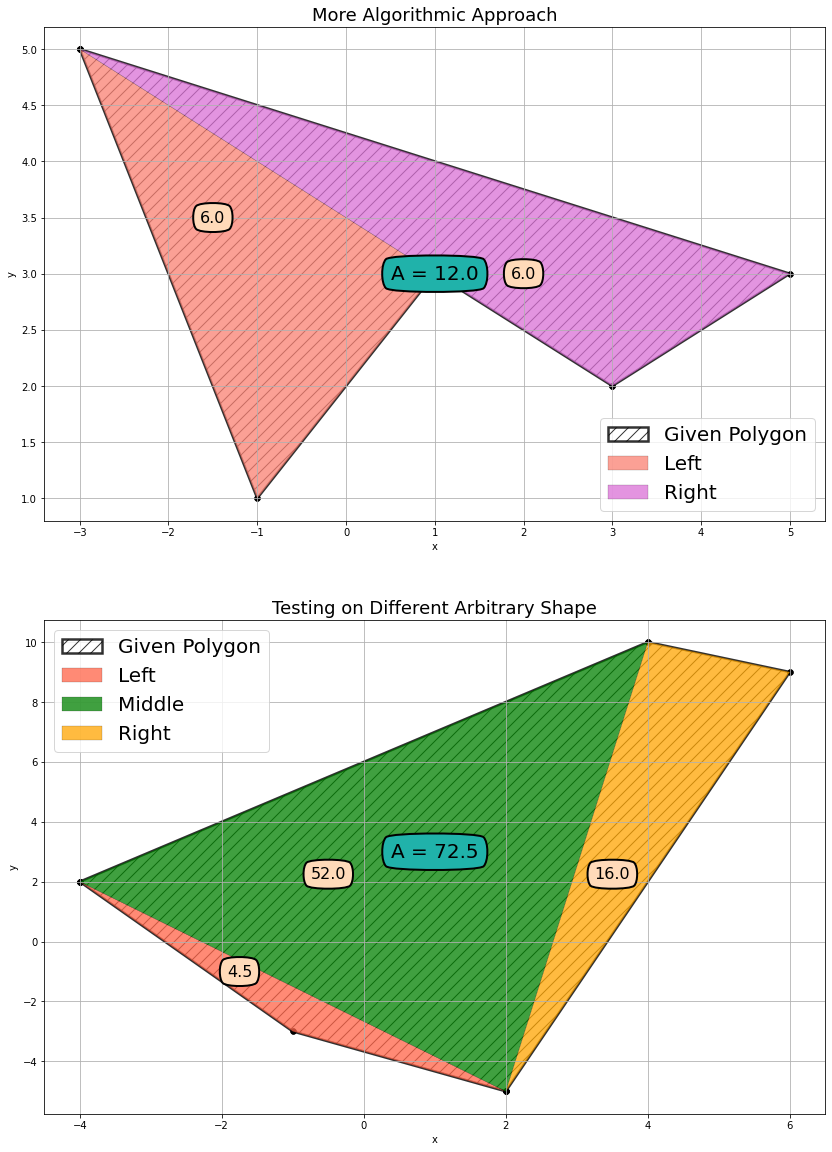

In [126]:
# Generalized Interior Approach (for other shapes?)
C = (14, 20)
fig, (ax3,ax4) = plt.subplots(2, 1, figsize=(C))
# Test Cases
test_poly = np.array([(-4, 2), (-1, -3), (2, -5), (6, 9), (4, 10), (-4, 2)])
# re order prob poly
prob_poly = np.array([(-3, 5),(-1, 1), (1, 3), (3, 2), (5, 3), (-3, 5)])
cases = [prob_poly, test_poly]
case_names = ['More Algorithmic Approach', 'Testing on Different Arbitrary Shape']
# Make solvers
test1, test2 = [PolySolve(cn, c) for c, cn in zip(cases, case_names)]
# Test1
test1.make_piece('Left', 0, prob_poly, 'salmon')
test1.make_piece('Right', 3, prob_poly, 'orchid')
# Test2
# left
test2.make_piece('Left', 0, test_poly, 'tomato')
# mid
mid = np.array([test_poly[0], test_poly[2], test_poly[-2], test_poly[0]])
test2.add_piece('Middle', mid, 'green')
# right
right = np.array([test_poly[2], test_poly[3], test_poly[-2], test_poly[2]])
test2.add_piece('Right', right, 'orange')
# extra
if len(test_poly) > 6:
  extra = np.array(make_tri(3, test_poly))
  test2.make_piece('Extra', 3, test_poly, 'lightsteelblue')
test1.make_plot(ax3)
test2.make_plot(ax4)

## Derivation with Vector Field Line Integral

Show that $$ \int_C \vec{F} \cdot ds = \frac{1}{2}(x_1 y_2 - x_2 y_1) $$

Let $ \vec{F} = \frac{1}{2} \left \langle -y, x \right \rangle $ and let $ C $ be the line segment from $ (x_1, y_1) \ \text{to} \ (x_2, y_2) $

Parameterize $ C $ (using points (-1, 1) and (1, 3)

$$ x(t) = (1 - t) (-1) + t (1) = 2t - 1 $$

$$ y(t) = (1-t) (1) + t(3) = 2t + 1 $$

$$ \vec{r}(t) = \left \langle 2t - 1, 2t + 1 \right \rangle $$
$$ \vec{r'}(t) = \left \langle 2, 2 \right \rangle $$

Sub parameterized components into vector field equation

$$ \vec{F} = \frac{1}{2} \left \langle -y, x \right \rangle = \left \langle \frac{-y}{2}, \frac{x}{2} \right \rangle $$

$$ \int_C \vec{F} \cdot ds = \int_{a}^{b} F(r(t)) \cdot r'(t) dt $$

$$ \int_C \vec{F} \cdot ds = \int_{0}^{1} \left \langle \frac{-(2t+1)}{2},  \frac{2t - 1}{2} \right \rangle \cdot \left \langle 2, 2 \right \rangle $$

Calculating the dot product, the fractions cancel and everything simplifies nicely to 
$$ \int_{0}^{1} -2 dt = -2 $$

We could choose a simpler parameterization, using the same points let $ x = t $ then $ y = t + 2 $, this changes our limits of integration to $ -1 \leq t \leq 1 $, our integrand ends up the same $ -2 dt $ but with an extra factor of $ \frac{1}{2} $ which still evalutes to -2, given our limits 
$$ \frac{1}{2} \int_{-1}^{1} -2 dt = -2 $$

Evaluating the RHS is straightforward, using our same points (-1, 1) and (1, 3)

$$ \frac{1}{2} (1*3 - 1*1) = \frac{1}{2}(3 - 1) = -2 $$


In [ ]:
import sympy as sym

x, y, t = sym.symbols('x y t')

Fvec = sym.Matrix([-y/2, x/2])

xt = 2*t-1
yt = 2*t+1

intLine = Fvec.subs(y, yt)
intLine = intLine.subs(x, xt)
display(intLine)
rprime = sym.Matrix([sym.diff(xt), sym.diff(yt)])

intLine = intLine.dot(rprime)
display(intLine, rprime)
sym.integrate(intLine, (t, 0, 1))

Matrix([
[-t - 1/2],
[ t - 1/2]])

-2

Matrix([
[2],
[2]])

-2